In [2]:
import json
from pathlib import Path
from matplotlib import pyplot as plt
import networkx as nx

plt.rcParams["figure.dpi"] = plt.rcParamsDefault["figure.dpi"]
plt.rcParams["figure.figsize"] = (3,3)
# plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
weight_labels = {
    0: 'Brute',
    0.5: 'AStar',
    1: 'Dijkstra',
}

colors = {
    0: 'blue',
    0.5: 'red',
    1.0: 'green',
    1: 'green',
}


In [3]:
file = open("evaluation/results/pixels-AStar0.5-60s.json", mode="r")
data = json.load(file)
file.close()
for i, c in enumerate(data['cases']):
    if 'graph' in data['cases'][i]:
        data['cases'][i].pop('graph')
with open("evaluation/results/pixels-AStar0.5-60s_nograph.json", mode="w") as file:
    json.dump(data, file)

In [3]:
# path = Path("evaluation/results/pixels-AStar0.2-60s.json")
# file = open(path, mode="r")
# data = json.load(file)
weight_fname = {
    0: "evaluation/results/pixels-AStar0-60s.json",
    0.1: "evaluation/results/pixels-AStar0.1-60s_nograph.json",
    0.2: "evaluation/results/pixels-AStar0.2-60s.json",
    0.3: "evaluation/results/pixels-AStar0.3-60s_nograph.json",
    0.4: "evaluation/results/pixels-AStar0.4-60s_nograph.json",
    0.5: "evaluation/results/pixels-AStar0.5-60s_nograph.json",
}
weight_data = {}
for w, fname in weight_fname.items():
    file = open(fname, mode="r")
    data = json.load(file)
    # for i, tc in enumerate(data['cases']):
    #     data['cases'][i].pop('graph')
    weight_data[w] = data
    file.close()

In [4]:
weight_size_cases = {}
for weight, data in weight_data.items():
    size_cases = {}
    for case in data['cases']:
        size = int(case['name'].split('-')[0])
        if size not in size_cases:
            size_cases[size] = list()
        size_cases[size].append(case)
    weight_size_cases[weight] = size_cases

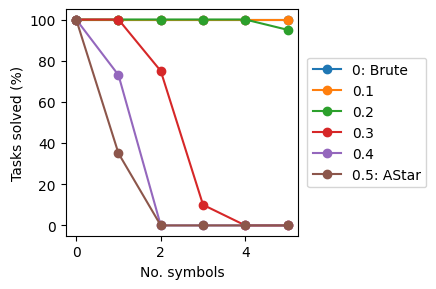

In [126]:
tasks_solved_plot_data = {}
for weight, size_cases in weight_size_cases.items():
    size_tasks_solved = {size: sum([int(c['solution_found']) for c in cases])/len(cases)*100 for size, cases in size_cases.items() }
    weight_label = str(weight)
    if weight in weight_labels:
        weight_label += f": {weight_labels.get(weight, '')}"
    plt.plot(size_tasks_solved.keys(), size_tasks_solved.values(), "o-", label=weight_label)
    tasks_solved_plot_data[weight] = (size_tasks_solved.keys(), size_tasks_solved.values(), weight_label)

plt.xlabel("No. symbols")
plt.ylabel("Tasks solved (%)")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
# axes = plt.gca()
# axes.set_aspect(3)
plt.savefig('pixels_tasks_solved.svg', bbox_inches="tight")

plt.show()

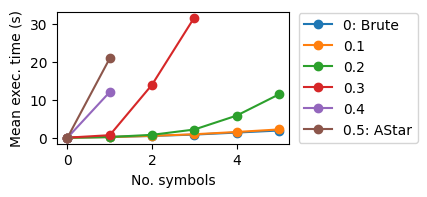

In [93]:
from numpy import NaN

execution_time_plot_data = {}
for weight, size_cases in weight_size_cases.items():
    size_time = {}
    size_iterations = {}
    for size, cases in size_cases.items():
        solved_cases = [c for c in cases if c['solution_found']]
        if len(solved_cases) == 0:
            mean_iterations = NaN
            mean_time = NaN
        else:
            mean_iterations = sum([c['iteration_count'] for c in solved_cases])/len(solved_cases)
            mean_time = sum([c['execution_time'] for c in solved_cases])/len(solved_cases)
        size_iterations[size] = mean_iterations
        size_time[size] = mean_time

    weight_label = str(weight)
    if weight in weight_labels:
        weight_label += f": {weight_labels.get(weight, '')}"
    plt.plot(size_time.keys(), size_time.values(), "-o", label=weight_label)
    execution_time_plot_data[weight] = (size_time.keys(), size_time.values(), weight_label)

plt.xlabel("No. symbols")
plt.ylabel("Mean exec. time (s)")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
axes = plt.gca()
axes.set_aspect(0.09)
plt.savefig("pixels_execution_time.svg", bbox_inches="tight")

plt.show()

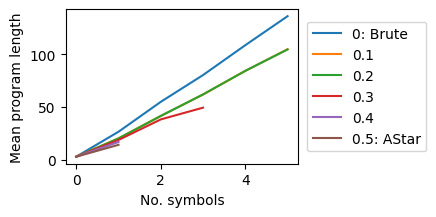

In [94]:
program_length_plot_data = {}
for weight, size_cases in weight_size_cases.items():
    size_program_length = {}
    for size, cases in size_cases.items():
        solved_cases = [c for c in cases if c['solution_found']]
        if len(solved_cases) == 0:
            mean_program_length = NaN
        else:
            mean_program_length = sum([c['best_program_length'] for c in solved_cases])/len(solved_cases)
        size_program_length[size] = mean_program_length

    weight_label = str(weight)
    if weight in weight_labels:
        weight_label += f": {weight_labels.get(weight, '')}"
    plt.plot(size_program_length.keys(), size_program_length.values(), label=weight_label)
    program_length_plot_data[weight] = (size_program_length.keys(), size_program_length.values(), weight_label)

plt.xlabel("No. symbols")
plt.ylabel("Mean program length")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
axes = plt.gca()
axes.set_aspect(0.025)
plt.savefig("pixels_program_length.svg", bbox_inches="tight")

plt.show()

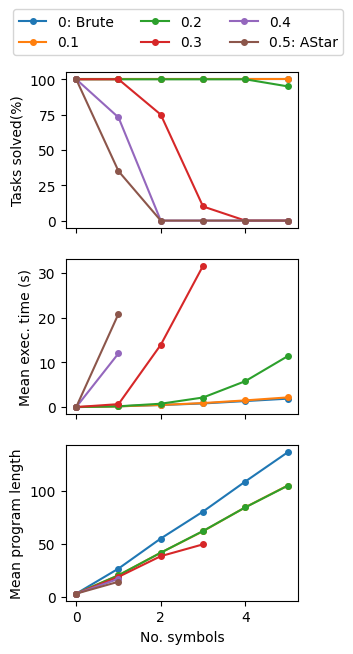

In [144]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(3,7))
ax1.set(ylabel="Tasks solved(%)")
for weight, (x, y, lbl) in tasks_solved_plot_data.items():
    ax1.plot(x, y, 'o-', markersize=4, label=lbl)
ax2.set(ylabel="Mean exec. time (s)")
for weight, (x, y, lbl) in execution_time_plot_data.items():
    ax2.plot(x, y, 'o-', markersize=4, label=lbl)
ax3.set(ylabel="Mean program length")
for weight, (x, y, lbl) in program_length_plot_data.items():
    ax3.plot(x, y, 'o-', markersize=4, label=lbl)

ax3.set(xlabel="No. symbols")
handles, labels = ax3.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.97), borderaxespad=0, ncol=3)

plt.savefig("pixels_combined.svg", bbox_inches="tight")
plt.show()






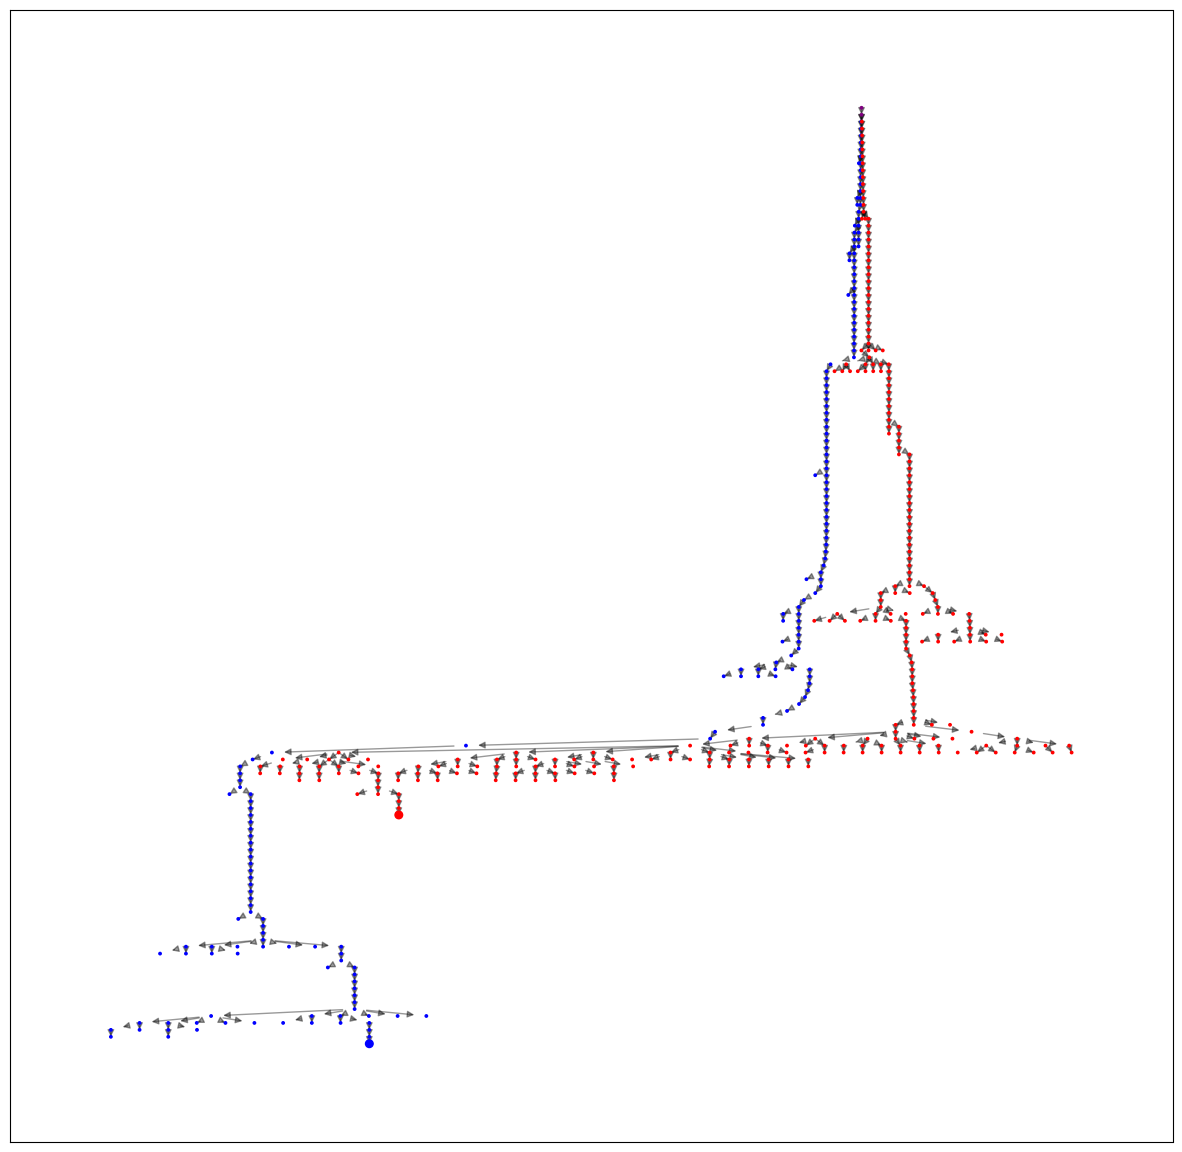

In [17]:
from utilities import PGraph

# case_id = 39
case_id = 23

B_data = weight_size_cases[0][5][case_id]['graph']
B = nx.node_link_graph(B_data)
for node in B.nodes:
    B.nodes[node]['B'] = True

A_data = weight_size_cases[0.2][5][case_id]['graph']
A = nx.node_link_graph(A_data)
for node in A.nodes:
    A.nodes[node]['A'] = True

G = nx.compose(B, A)

pos = nx.nx_agraph.graphviz_layout(G, prog="dot", args="")
labels = {node: node[-1] if node else "" for node in G.nodes}
# labels = {n: n[-1] for n in G.nodes if 'solution' in G.nodes[n]}
edge_labels = {edge: G.nodes[edge[1]]['seq'] for edge in G.edges if 'seq' in G.nodes[edge[1]]}

colormap = list()
for node in G.nodes:
    color = 'purple'
    if 'B' not in G.nodes[node]:
        color = 'red'
    elif 'A' not in G.nodes[node]:
        color = 'blue'
    colormap.append(color)

sizemap = [3 if 'solution' not in G.nodes[n] else 30 for n in G.nodes ]

# nx.draw_networkx_edges(G, pos, alpha=0.2)
plt.figure(figsize=(15,15))
# nx.draw_networkx_labels(G, pos, labels, font_size=15, font_family="Ubuntu Mono")
nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_nodes(G, pos, node_size=sizemap, node_color=colormap)
# nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8, font_family="Ubuntu Mono", rotate=False)


plt.show()

# A_data = weight_size_cases[0.2][2][case_id]['graph']
# A = nx.node_link_graph(A_data)


# pos = nx.nx_agraph.graphviz_layout(B, prog="dot", args="")
# nx.draw_networkx_edges(B, pos, alpha=0.2)
#
#
# A_data = weight_size_cases[0.2][2][case_id]['graph']
# A = nx.node_link_graph(A_data)
#
# pos = nx.nx_agraph.graphviz_layout(A, prog="dot", args="")
# nx.draw_networkx_edges(A, pos, alpha=0.2)
# plt.show()


# pos = nx.nx_agraph.graphviz_layout(G, prog="dot", args="")
# labels = {node: node[-1] if node else "" for node in G.nodes}
# # edge_labels = {edge: labels[edge[1]] for edge in G.edges}
# edge_labels = {edge: G.nodes[edge[1]]['seq'] for edge in G.edges if 'seq' in G.nodes[edge[1]]}
#
# nx.draw_networkx_edges(G, pos, alpha=0.2)
# # nx.draw_networkx_nodes(G, pos, node_size=20, alpha=0.2, node_color="blue")
# nx.draw_networkx_labels(G, pos, labels, font_size=9, font_family="Ubuntu Mono")
# nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8, font_family="Ubuntu Mono", rotate=False)